In [1]:
import warnings
warnings.filterwarnings("ignore")
import os 
import shutil
import glob

In [2]:
TRAIN_DIR = "./DATASE"
ORG_DIR = "./train"
CLASS = ["cat","dog"]

In [3]:
for C in CLASS:
    DEST = os.path.join(TRAIN_DIR,C)
    
    if not os.path.exists(DEST):
        os.makedirs(DEST)
    
    for img_path in glob.glob(os.path.join(ORG_DIR,C) + "*"):
        SRC = img_path
        shutil.copy(SRC,DEST)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [9]:
base_model = InceptionV3(input_shape=(256,256,3),include_top=False)

87924736/87910968 [==============================] - 79s 1us/step


In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [12]:
X = Flatten()(base_model.output)
X = Dense(units = 2, activation='sigmoid')(X)

In [13]:
model = Model(base_model.input,X)
model.compile(optimizer = "adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [14]:
train_datagen = ImageDataGenerator(featurewise_center=True,
                                  rotation_range=0.4,
                                  width_shift_range=0.3,
                                  preprocessing_function=preprocess_input,
                                  zoom_range=0.4,
                                  shear_range=0.4)

In [23]:
train_data = train_datagen.flow_from_directory("./DATASE",target_size=(256,256),
                                               batch_size=64)

Found 25000 images belonging to 2 classes.


In [24]:
train_data.class_indices

{'cat': 0, 'dog': 1}

In [25]:
t_img,label = train_data.next()

In [26]:
t_img.shape

(64, 256, 256, 3)

In [30]:
def plotImages(img_arr, label):
    for i,img in enumerate(img_arr):
        if i <= 10:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis = False
            plt.show()
        
            

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


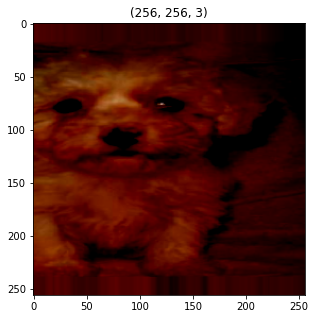

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


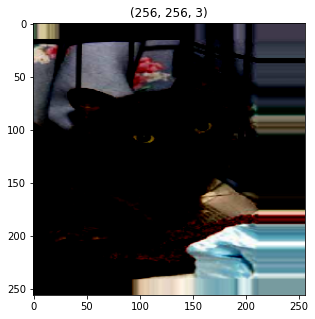

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


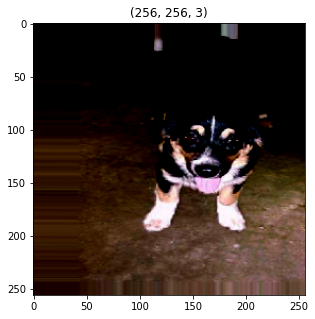

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


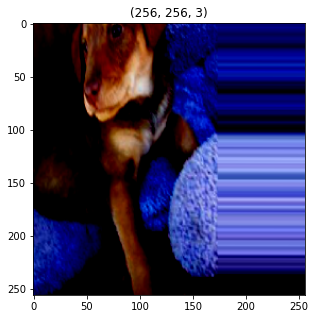

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


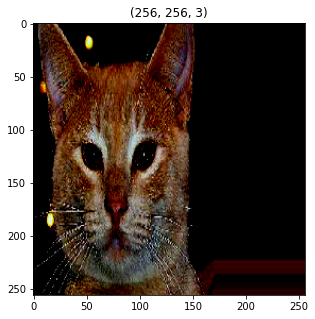

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


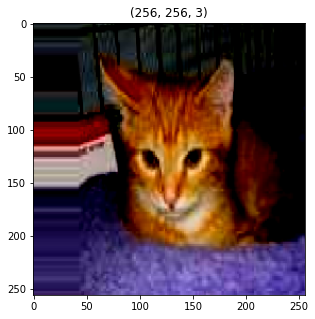

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


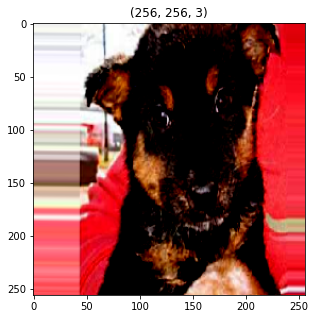

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


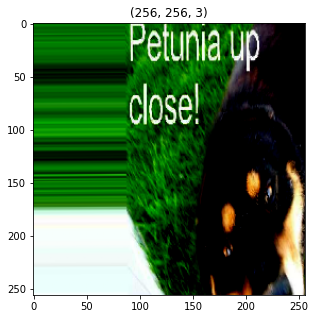

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


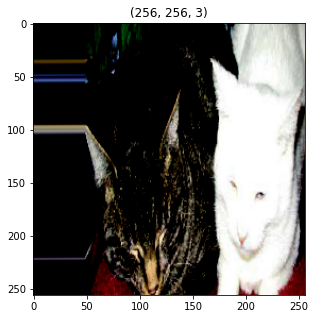

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


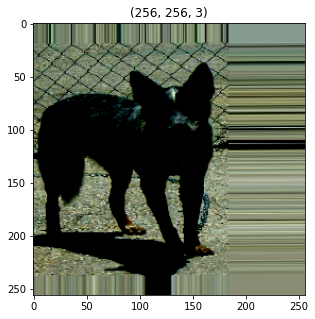

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


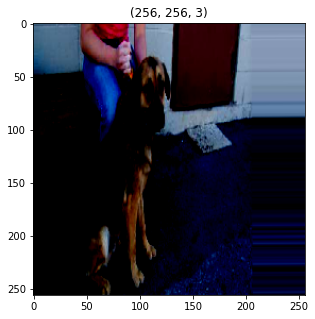

In [31]:
plotImages(t_img,label)

In [36]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

mc = ModelCheckpoint(filepath="./best_model.h5",monitor="accuracy",
                    verbose=1,
                    save_best_only=True)

In [37]:
es = EarlyStopping(monitor="accuracy",min_delta=0.01,
                   patience=5,
                  verbose=1)
cv = [mc,es]

In [38]:
his = model.fit_generator(train_data,steps_per_epoch=10,epochs = 30,callbacks=cv)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.2271 - accuracy: 0.9688
Epoch 00001: accuracy improved from -inf to 0.96875, saving model to .\best_model.h5
10/10 [==============================] - 26s 3s/step - loss: 0.2271 - accuracy: 0.9688
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.2168 - accuracy: 0.9766
Epoch 00002: accuracy improved from 0.96875 to 0.97656, saving model to .\best_model.h5
10/10 [==============================] - 26s 3s/step - loss: 0.2168 - accuracy: 0.9766
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.0709 - accuracy: 0.9922
Epoch 00003: accuracy improved from 0.97656 to 0.99219, saving model to .\best_model.h5
10/10 [==============================] - 26s 3s/step - loss: 0.0709 - accuracy: 0.9922
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.0873 - accuracy: 0.9859
Epoch 00004: accuracy did not improve from 0.99219
10/10 [==============================] - 24s 2s/ste

In [39]:
from keras.models import load_model
model = load_model('best_model.h5')

In [40]:
h = his.history
h.keys() 

dict_keys(['loss', 'accuracy'])

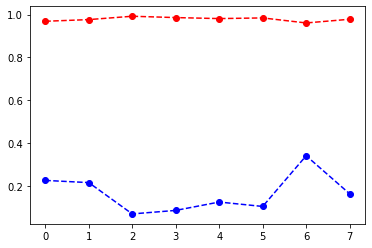

In [45]:
plt.plot(h['loss'],'go--',c="blue")
plt.plot(h['accuracy'],'go--',c="red")